This is for the Davis Club dataset

In [528]:
# Import required libraries
import networkx as nx
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Reset and define figure size for plots
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [5, 5]

Read in the Davis Southern Women group data from the given Networkx function

In [529]:
# From https://networkx.org/documentation/networkx-1.11/examples/algorithms/davis_club.html?highlight=davis%20club

# This matrix just shows all the '1''s in the matrix, so it's smaller than the full 0,1 matrix
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']
#print("Biadjacency matrix")
#print(bi.biadjacency_matrix(G,women,clubs))

Generate projected graph based on the women nodes to determine the connections

- Nodes that share a common neighbor

In [616]:
# project bipartite graph onto women nodes
# PST: This is connecting the people based on a shared node, which would be a club node, so Evelyn Jefferson is connecte to every other person through at least one event
W = bi.projected_graph(G, women)

women_deg_dict = {}
for w in women:
        women_deg_dict[w] = W.degree(w)
{k: v for k, v in sorted(women_deg_dict.items(), key=lambda item: item[1], reverse=True)}

{'Evelyn Jefferson': 17,
 'Theresa Anderson': 17,
 'Ruth DeSand': 17,
 'Verne Sanderson': 17,
 'Sylvia Avondale': 17,
 'Nora Fayette': 17,
 'Helen Lloyd': 17,
 'Pearl Oglethorpe': 16,
 'Myra Liddel': 16,
 'Katherina Rogers': 16,
 'Dorothy Murchison': 16,
 'Laura Mandeville': 15,
 'Brenda Rogers': 15,
 'Frances Anderson': 15,
 'Eleanor Nye': 15,
 'Olivia Carleton': 12,
 'Flora Price': 12,
 'Charlotte McDowd': 11}

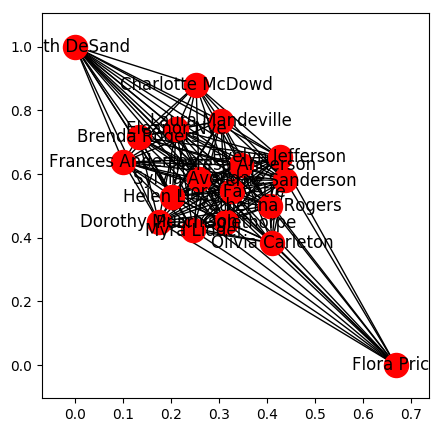

In [609]:
nx.draw_networkx(W)

Weighted Projected Graph is the equivalent of determining an affilitation network in the PACs example

In [618]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bi.weighted_projected_graph(G, women, ratio=False)

women_wgt_dict = {}
for w in women:
        women_wgt_dict[w] = (W.degree(w,weight='weight'))
{k: v for k, v in sorted(women_wgt_dict.items(), key=lambda item: item[1], reverse=True)}

{'Theresa Anderson': 57,
 'Evelyn Jefferson': 50,
 'Brenda Rogers': 46,
 'Sylvia Avondale': 46,
 'Laura Mandeville': 45,
 'Nora Fayette': 43,
 'Ruth DeSand': 40,
 'Verne Sanderson': 38,
 'Katherina Rogers': 37,
 'Eleanor Nye': 36,
 'Helen Lloyd': 34,
 'Myra Liddel': 33,
 'Frances Anderson': 32,
 'Pearl Oglethorpe': 31,
 'Charlotte McDowd': 24,
 'Dorothy Murchison': 24,
 'Olivia Carleton': 14,
 'Flora Price': 14}

Taking largest component, it is all connected, so only one component

In [534]:
# compared to the book, removed the [0] at the end
#list_W=list(nx.connected_component_subgraphs(W))

In [535]:
#Wnet = list_W[0]

Highlight strength of relationships using color and edge thickness. Use logarithm to compress the numeric range

In [619]:
#weights=[math.log(edata['weight']) for f,t,edata in Wnet.edges(data=True)]

Draw the graph

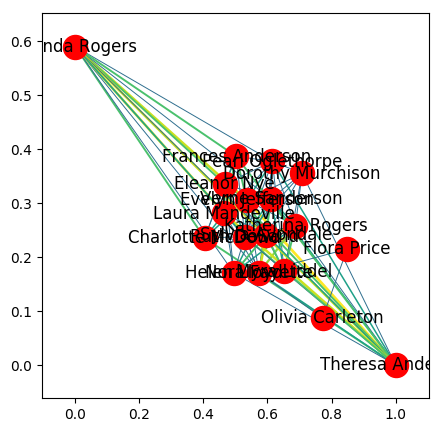

In [620]:
#nx.draw_networkx(Wnet,width=weights, edge_color=weights)

In [621]:
weights=[math.log(edata['weight']) for f,t,edata in W.edges(data=True)]

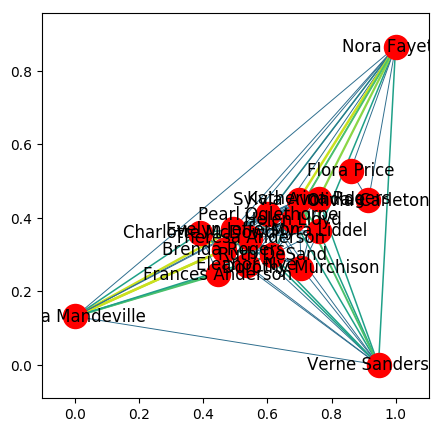

In [622]:
nx.draw_networkx(W, width=weights, edge_color=weights)

No thick red lines exist signify strong relationships; some yellow would indicate semi-string relationships

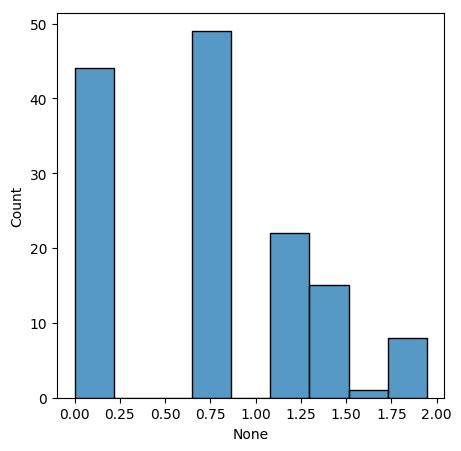

In [538]:
# Need to create histogram of the weights
sns.histplot(data=weights);

So the histogram indicates most under 1.0, and a few to focus on above 1.5, so let's try that approach

In [539]:
# From book
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

In [540]:
## The weights histogram is logarithmic;
## we should compute the original weight = e^log_weight
Wnet_trim=trim_edges(Wnet, weight=math.exp(1.5))

/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:526: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  for c in edge_color]):
/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:532: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  for c in edge_color]):
/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


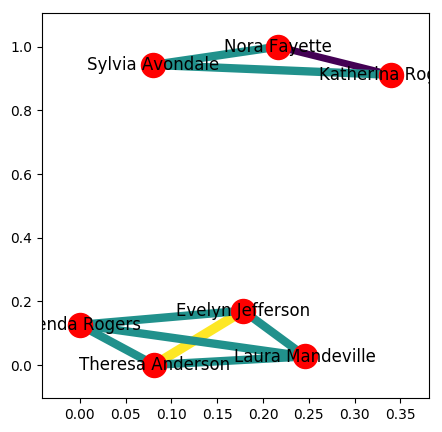

In [541]:
## re-calculate weights based on the new graph
weights=[edata['weight'] for f,t,edata in Wnet_trim.edges(data=True)]
nx.draw_networkx(Wnet_trim,width=weights, edge_color=weights)

Tightest groups (affiliation network of the women)

- Group 1
    - Nora F
    - Sylvia A
    - Katherina R
- Group 2
    - Laura M
    - Brenda R
    - Theresa A
    - Evelyn J

Indicates 11 people not included here

In [542]:
## The weights histogram is logarithmic;
## we should compute the original weight = e^log_weight
Wnet_trim=trim_edges(Wnet, weight=math.exp(1.25))

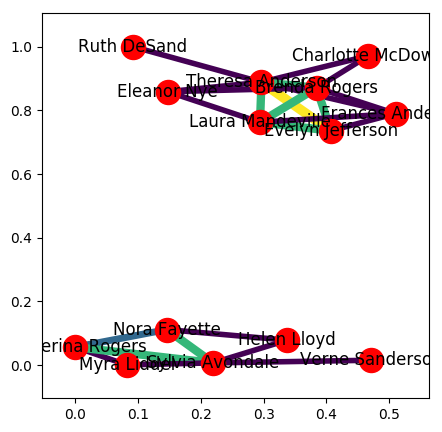

In [543]:
## re-calculate weights based on the new graph
weights=[edata['weight'] for f,t,edata in Wnet_trim.edges(data=True)]
nx.draw_networkx(Wnet_trim,width=weights, edge_color=weights)

Semi-tight groups

- Group 1 (6)
    - Nora F
    - Sylvia A
    - Katherina R
    - Myra L
    - Helen L
    - Verne S
- Group 2 (8)
    - Laura M
    - Brenda R
    - Theresa A
    - Evelyn J
    - Frances A
    - Eleanor N
    - Charlotte M
    - Ruth D
    
4 people not included here

In [544]:
## The weights histogram is logarithmic;
## we should compute the original weight = e^log_weight
Wnet_trim=trim_edges(Wnet, weight=math.exp(1.09))

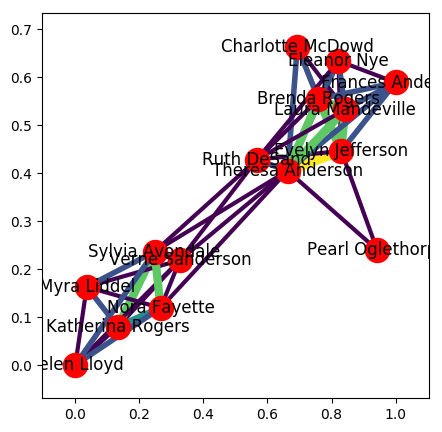

In [545]:
## re-calculate weights based on the new graph
weights=[edata['weight'] for f,t,edata in Wnet_trim.edges(data=True)]
nx.draw_networkx(Wnet_trim,width=weights, edge_color=weights)

Above graph connects the two islands and identifies possible boundary spanners

In [546]:
C = bi.weighted_projected_graph(G, clubs, ratio=False)
C

In [547]:
list_C = list(nx.connected_component_subgraphs(C))

In [548]:
Cnet = list_C[0]

In [549]:
weights=[math.log(edata['weight']) for f,t,edata in Cnet.edges(data=True)]

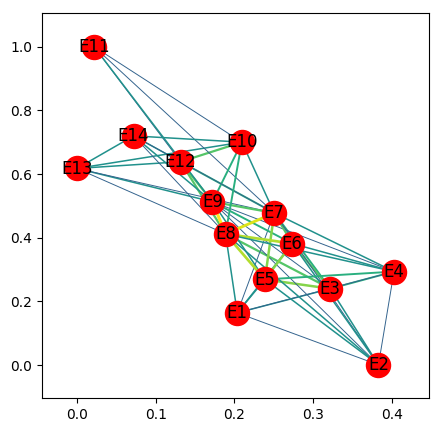

In [550]:
nx.draw_networkx(Cnet, width=weights, edge_color=weights)

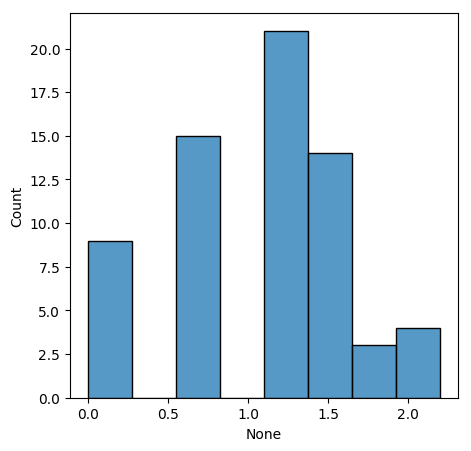

In [551]:
# Need to create histogram of the weights
sns.histplot(data=weights);

In [552]:
## The weights histogram is logarithmic;
## we should compute the original weight = e^log_weight
Cnet_trim=trim_edges(Cnet, weight=math.exp(1.75))

/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:526: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  for c in edge_color]):
/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:532: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  for c in edge_color]):
/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


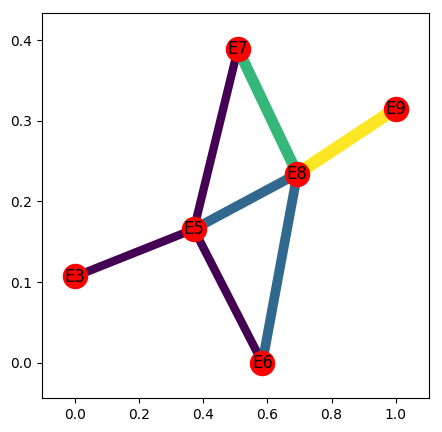

In [553]:
## re-calculate weights based on the new graph
weights=[edata['weight'] for f,t,edata in Cnet_trim.edges(data=True)]
nx.draw_networkx(Cnet_trim, width=weights, edge_color=weights)

Above shows the island of events (affiliation network of events)

/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


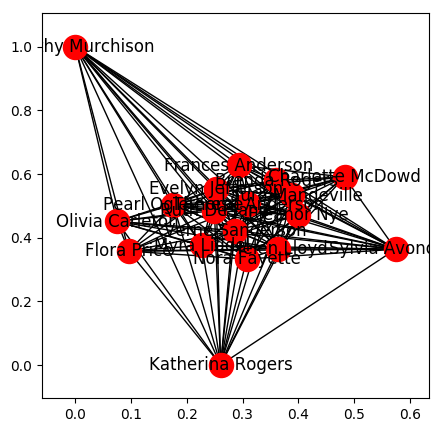

In [554]:
nx.draw_networkx(W)

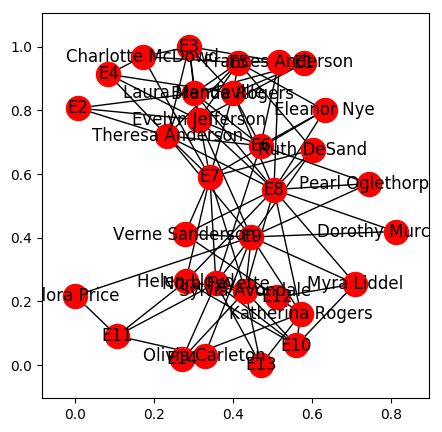

In [555]:
nx.draw_networkx(G)

In [556]:
G.nodes()

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [557]:
G.edges()

[('Evelyn Jefferson', 'E1'),
 ('Evelyn Jefferson', 'E2'),
 ('Evelyn Jefferson', 'E3'),
 ('Evelyn Jefferson', 'E4'),
 ('Evelyn Jefferson', 'E5'),
 ('Evelyn Jefferson', 'E6'),
 ('Evelyn Jefferson', 'E8'),
 ('Evelyn Jefferson', 'E9'),
 ('Laura Mandeville', 'E1'),
 ('Laura Mandeville', 'E2'),
 ('Laura Mandeville', 'E3'),
 ('Laura Mandeville', 'E5'),
 ('Laura Mandeville', 'E6'),
 ('Laura Mandeville', 'E7'),
 ('Laura Mandeville', 'E8'),
 ('Theresa Anderson', 'E2'),
 ('Theresa Anderson', 'E3'),
 ('Theresa Anderson', 'E4'),
 ('Theresa Anderson', 'E5'),
 ('Theresa Anderson', 'E6'),
 ('Theresa Anderson', 'E7'),
 ('Theresa Anderson', 'E8'),
 ('Theresa Anderson', 'E9'),
 ('Brenda Rogers', 'E1'),
 ('Brenda Rogers', 'E3'),
 ('Brenda Rogers', 'E4'),
 ('Brenda Rogers', 'E5'),
 ('Brenda Rogers', 'E6'),
 ('Brenda Rogers', 'E7'),
 ('Brenda Rogers', 'E8'),
 ('Charlotte McDowd', 'E3'),
 ('Charlotte McDowd', 'E4'),
 ('Charlotte McDowd', 'E5'),
 ('Charlotte McDowd', 'E7'),
 ('Frances Anderson', 'E3'),
 ('Fra

In [558]:
bi.is_bipartite(G)

True

In [559]:
women = G.graph['top']
clubs = G.graph['bottom']

In [560]:
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [561]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

In [562]:
nx.is_connected(G)

True

In [563]:
top_nodes, bottom_nodes = bi.sets(G)

In [564]:
top_nodes

{'Brenda Rogers',
 'Charlotte McDowd',
 'Dorothy Murchison',
 'Eleanor Nye',
 'Evelyn Jefferson',
 'Flora Price',
 'Frances Anderson',
 'Helen Lloyd',
 'Katherina Rogers',
 'Laura Mandeville',
 'Myra Liddel',
 'Nora Fayette',
 'Olivia Carleton',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Sylvia Avondale',
 'Theresa Anderson',
 'Verne Sanderson'}

## Density is 35%

In [565]:
print(round(bi.density(G, bottom_nodes),2))

0.35


In [566]:
bi.color(G)

{'Evelyn Jefferson': 1,
 'E1': 0,
 'E2': 0,
 'E3': 0,
 'E4': 0,
 'E5': 0,
 'E6': 0,
 'E8': 0,
 'E9': 0,
 'Theresa Anderson': 1,
 'Pearl Oglethorpe': 1,
 'Ruth DeSand': 1,
 'Verne Sanderson': 1,
 'Myra Liddel': 1,
 'Katherina Rogers': 1,
 'Sylvia Avondale': 1,
 'Nora Fayette': 1,
 'Dorothy Murchison': 1,
 'Olivia Carleton': 1,
 'Flora Price': 1,
 'E11': 0,
 'Helen Lloyd': 1,
 'E7': 0,
 'E10': 0,
 'E12': 0,
 'Laura Mandeville': 1,
 'Brenda Rogers': 1,
 'Charlotte McDowd': 1,
 'Eleanor Nye': 1,
 'E13': 0,
 'E14': 0,
 'Frances Anderson': 1}

Confirm density is 35%

In [567]:
bi.density(G, top_nodes)

0.3531746031746032

In [568]:
bi.density(G, bottom_nodes)

0.3531746031746032

In [569]:
bi.degrees(G, top_nodes)

({'E13': 3,
  'E3': 6,
  'E11': 4,
  'E1': 3,
  'E9': 12,
  'E14': 3,
  'E7': 10,
  'E10': 5,
  'E6': 8,
  'E2': 3,
  'E8': 14,
  'E4': 4,
  'E12': 6,
  'E5': 8},
 {'Charlotte McDowd': 4,
  'Verne Sanderson': 4,
  'Frances Anderson': 4,
  'Theresa Anderson': 8,
  'Myra Liddel': 4,
  'Olivia Carleton': 2,
  'Helen Lloyd': 5,
  'Brenda Rogers': 7,
  'Flora Price': 2,
  'Pearl Oglethorpe': 3,
  'Evelyn Jefferson': 8,
  'Katherina Rogers': 6,
  'Dorothy Murchison': 2,
  'Eleanor Nye': 4,
  'Nora Fayette': 8,
  'Sylvia Avondale': 7,
  'Ruth DeSand': 4,
  'Laura Mandeville': 7})

In [570]:
# Not sure if I care about this
nx.bipartite.maximum_matching(G)

{'Pearl Oglethorpe': 'E6',
 'Evelyn Jefferson': 'E1',
 'Charlotte McDowd': 'E3',
 'Katherina Rogers': 'E13',
 'Dorothy Murchison': 'E9',
 'Eleanor Nye': 'E5',
 'Verne Sanderson': 'E7',
 'Nora Fayette': 'E14',
 'Frances Anderson': 'E8',
 'Theresa Anderson': 'E2',
 'Sylvia Avondale': 'E12',
 'Myra Liddel': 'E10',
 'Olivia Carleton': 'E11',
 'Brenda Rogers': 'E4',
 'E12': 'Sylvia Avondale',
 'E13': 'Katherina Rogers',
 'E3': 'Charlotte McDowd',
 'E11': 'Olivia Carleton',
 'E1': 'Evelyn Jefferson',
 'E9': 'Dorothy Murchison',
 'E14': 'Nora Fayette',
 'E7': 'Verne Sanderson',
 'E6': 'Pearl Oglethorpe',
 'E2': 'Theresa Anderson',
 'E8': 'Frances Anderson',
 'E4': 'Brenda Rogers',
 'E10': 'Myra Liddel',
 'E5': 'Eleanor Nye'}

In [571]:
G_2 = bi.weighted_projected_graph(G, top_nodes)

In [573]:
# https://coderzcolumn.com/tutorials/data-science/network-analysis-in-python-important-structures-and-bipartite-graphs-networkx#5
list(G.nodes(data=True))[:5]

[('Evelyn Jefferson', {'bipartite': 0}),
 ('Laura Mandeville', {'bipartite': 0}),
 ('Theresa Anderson', {'bipartite': 0}),
 ('Brenda Rogers', {'bipartite': 0}),
 ('Charlotte McDowd', {'bipartite': 0})]

In [574]:
list(G.edges(data=True))[:5]

[('Evelyn Jefferson', 'E1', {}),
 ('Evelyn Jefferson', 'E2', {}),
 ('Evelyn Jefferson', 'E3', {}),
 ('Evelyn Jefferson', 'E4', {}),
 ('Evelyn Jefferson', 'E5', {})]

In [575]:
women_nodes = [node for node in G.nodes() if G.node[node]['bipartite'] == 0]
women_nodes_with_centrality = [node for node in nx.bipartite.degree_centrality(G, women_nodes).items() if len(node[0]) > 3]
sorted(women_nodes_with_centrality, key=lambda x: x[1], reverse=True)[:10]

[('Evelyn Jefferson', 0.5714285714285714),
 ('Nora Fayette', 0.5714285714285714),
 ('Theresa Anderson', 0.5714285714285714),
 ('Sylvia Avondale', 0.5),
 ('Laura Mandeville', 0.5),
 ('Brenda Rogers', 0.5),
 ('Katherina Rogers', 0.42857142857142855),
 ('Helen Lloyd', 0.3571428571428571),
 ('Charlotte McDowd', 0.2857142857142857),
 ('Eleanor Nye', 0.2857142857142857)]

In [576]:
women_nodes = [node for node in G.nodes() if G.node[node]['bipartite'] == 0]
women_nodes_with_centrality = [node for node in nx.bipartite.closeness_centrality(G, women_nodes).items() if len(node[0]) > 3]
sorted(women_nodes_with_centrality, key=lambda x: x[1], reverse=True)[:10]

[('Evelyn Jefferson', 0.8),
 ('Nora Fayette', 0.8),
 ('Theresa Anderson', 0.8),
 ('Sylvia Avondale', 0.7741935483870968),
 ('Katherina Rogers', 0.7272727272727273),
 ('Laura Mandeville', 0.7272727272727273),
 ('Helen Lloyd', 0.7272727272727273),
 ('Brenda Rogers', 0.7272727272727273),
 ('Verne Sanderson', 0.7058823529411765),
 ('Ruth DeSand', 0.7058823529411765)]

In [577]:
women_nodes = [node for node in G.nodes() if G.node[node]['bipartite'] == 0]
women_nodes_with_centrality = [node for node in nx.bipartite.betweenness_centrality(G, women_nodes).items() if len(node[0]) > 3]
sorted(women_nodes_with_centrality, key=lambda x: x[1], reverse=True)[:10]

[('Nora Fayette', 0.11346136204298476),
 ('Evelyn Jefferson', 0.09658472108029267),
 ('Theresa Anderson', 0.08759468547944677),
 ('Sylvia Avondale', 0.07170914508501829),
 ('Laura Mandeville', 0.05135761326872536),
 ('Brenda Rogers', 0.0494865998160072),
 ('Katherina Rogers', 0.047362754029819695),
 ('Helen Lloyd', 0.04238754006434827),
 ('Ruth DeSand', 0.016783108139791406),
 ('Myra Liddel', 0.016344348365012626)]

In [578]:
event_nodes = [node for node in G.nodes() if G.node[node]['bipartite'] == 1]
event_nodes_with_centrality = [node for node in nx.bipartite.degree_centrality(G, event_nodes).items() if len(node[0]) < 4]
sorted(event_nodes_with_centrality, key=lambda x: x[1], reverse=True)[:5]

[('E8', 0.7777777777777777),
 ('E9', 0.6666666666666666),
 ('E7', 0.5555555555555556),
 ('E6', 0.4444444444444444),
 ('E5', 0.4444444444444444)]

In [579]:
event_nodes = [node for node in G.nodes() if G.node[node]['bipartite'] == 1]
event_nodes_with_centrality = [node for node in nx.bipartite.closeness_centrality(G, event_nodes).items() if len(node[0]) < 4]
sorted(event_nodes_with_centrality, key=lambda x: x[1], reverse=True)[:5]

[('E8', 0.8461538461538461),
 ('E9', 0.7857142857142857),
 ('E7', 0.7333333333333333),
 ('E6', 0.6875),
 ('E5', 0.5945945945945946)]

In [580]:
event_nodes = [node for node in G.nodes() if G.node[node]['bipartite'] == 1]
event_nodes_with_centrality = [node for node in nx.bipartite.betweenness_centrality(G, event_nodes).items() if len(node[0]) < 4]
sorted(event_nodes_with_centrality, key=lambda x: x[1], reverse=True)[:5]

[('E8', 0.24381946234957552),
 ('E9', 0.22551359177204106),
 ('E7', 0.12950174424519842),
 ('E6', 0.06501635047516072),
 ('E5', 0.03769444252500667)]

/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/matplotlib/__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be remo

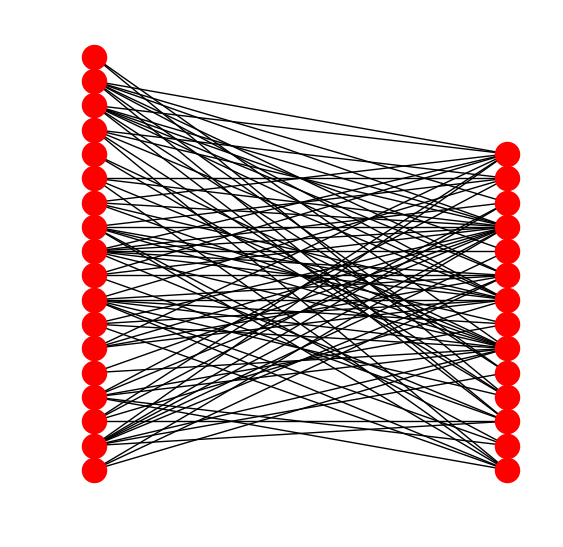

In [581]:
# from https://stackoverflow.com/questions/35472402/how-do-display-bipartite-graphs-with-python-networkx-package
# Separate by group
l, r = nx.bipartite.sets(G)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(G, pos=pos)
plt.show()

# Scratch Work Below

From chapter 5 in book

In [582]:
import csv
import math
import networkx as nx

In [583]:
## Import bi-partite (bi-modal) functions
from networkx.algorithms import bipartite as bi

In [584]:
## Read the data from a CSV file
## We use the Universal new-line mode since many CSV files are created by Excel
r = csv.reader(open('campaign_short.csv', 'rU'))

/opt/anaconda3/envs/sps620env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [585]:
## 2-mode graphs are usually directed. Here, their direction implies money flow 
g=nx.Graph()

In [586]:
## We need to keep track separately of nodes of all types
pacs=[]
candidates=[]

In [587]:
## Construct a directed graph from edges in the CSV file 
for row in r:
    if row[0] not in pacs:
        pacs.append(row[0])
    if row[12] not in candidates:
        candidates.append(row[12])
    g.add_edge(row[0],row[12], weight=int(row[10]))

In [588]:
pacs[:10]

['C00000042',
 'C00000059',
 'C00000125',
 'C00000372',
 'C00000422',
 'C00000489',
 'C00000547',
 'C00000638',
 'C00000729']

In [589]:
candidates[:10]

['S4MO00037',
 'H6IL14095',
 'H6IL06026',
 'H8IL10016',
 'H0IL10120',
 'H8CT05104',
 'H2IL01042',
 'H0IL15061',
 'S4MI00165',
 'H6IL17106']

In [590]:
pacnet=bi.weighted_projected_graph(g, pacs, ratio=False)

In [591]:
pacnet

In [592]:
# compared to the book, removed the [0] at the end
list_pacnet=list(nx.connected_component_subgraphs(pacnet))

In [593]:
pacnet_0=list_pacnet[0]

In [594]:
weights=[math.log(edata['weight']) for f,t,edata in pacnet_0.edges(data=True)]

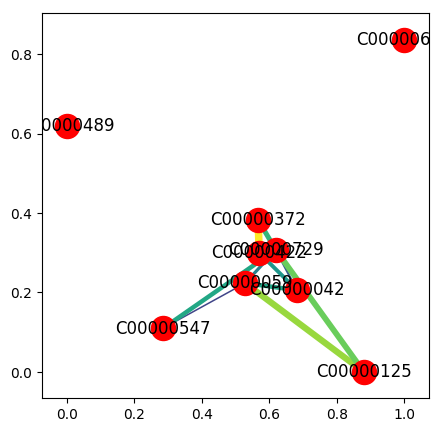

In [595]:
nx.draw_networkx(pacnet,width=weights, edge_color=weights)

From: https://ericmjl.github.io/Network-Analysis-Made-Simple/04-advanced/01-bipartite/

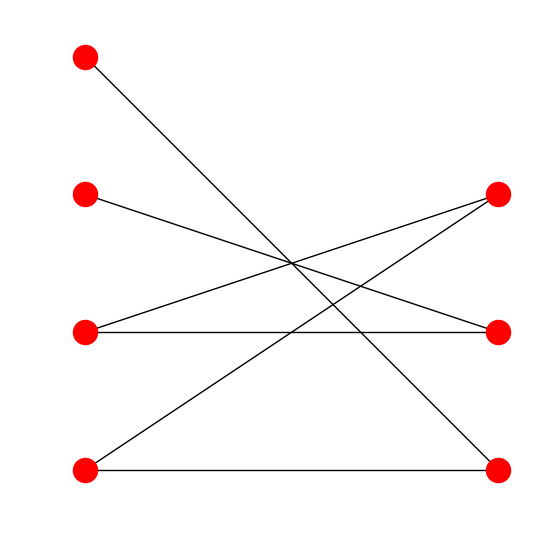

In [598]:
# from https://stackoverflow.com/questions/35472402/how-do-display-bipartite-graphs-with-python-networkx-package
B = nx.Graph()
B.add_nodes_from([1,2,3,4], bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(['a','b','c'], bipartite=1)
B.add_edges_from([(1,'a'), (1,'b'), (2,'b'), (2,'c'), (3,'c'), (4,'a')])

# Separate by group
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(B, pos=pos)
plt.show()